# Rozwiązywanie układów równań

## Metody pomocnicze do pracy z macierzami

Dodanie bibliotek

In [1]:
from math import sin
from math import sqrt
from copy import deepcopy
import matplotlib.pyplot as plt

### Tworzenie macierzy rozmiaru N x N, z a1 jako diagonalą i a2, a3 polami oddalonymi o 1 i 2 pola od diagonali

In [2]:
def create_matrix(a1, a2, a3, N):
    matrix = [[0 for i in range(N)] for j in range(N)]

    diag_index = 0

    for row in matrix:
        if diag_index - 2 >= 0:
            row[diag_index - 2] = a3
        if diag_index - 1 >= 0:
            row[diag_index - 1] = a2
        row[diag_index] = a1
        if diag_index + 1 < N:
            row[diag_index + 1] = a2
        if diag_index + 2 < N:
            row[diag_index + 2] = a3

        diag_index += 1

    return matrix

### Tworzenie wektora b

In [3]:
def create_vector(f, N):
    return [sin(i * (f + 1)) for i in range(N)]

### Funkcje tworzące odpowiednio macierz L, U i diagonalną z macierzy wejściowej. Chodzi o macierze dotyczące algorytmów iteracyjnych.

In [4]:
def get_L(matrix):
    n = len(matrix)
    new_matrix = [[0 for i in range(n)] for j in range(n)]
    for j, row in enumerate(matrix):
        for i, value in enumerate(row):
            if i >= j:
                break
            new_matrix[j][i] = value
    return new_matrix

In [5]:
def get_U(matrix):
    diag_index = 0
    n = len(matrix)
    new_matrix = [[0 for i in range(n)] for j in range(n)]
    for j, row in enumerate(matrix):
        for i, value in enumerate(row):
            if i <= diag_index:
                continue
            new_matrix[j][i] = value
        diag_index += 1
    return new_matrix

In [6]:
def get_D(matrix):
    n = len(matrix)
    new_matrix = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        new_matrix[i][i] = matrix[i][i]
    return new_matrix

### Funkcja dodająca do siebie dwie macierze

In [7]:
def add_martix(matrix1, matrix2):
    new_matrix = deepcopy(matrix1)
    for i, row in enumerate(matrix2):
        for j, element in enumerate(row):
            new_matrix[i][j] += element
    return new_matrix

### Funkcja dodająca dwa wektory

In [8]:
def add_vectors(vecor1, vector2):
    new_vector = [el for el in vecor1]
    for i, element in enumerate(vector2):
        new_vector[i] += element
    return new_vector

### Funkcja mnożąca macierz i wektor

In [9]:
def multiply_matrix_vector(matrix, vector):
    n = len(matrix)
    new_vector = [0 for _ in range(n)]
    for i, row in enumerate(matrix):
        for j, element in enumerate(row):
            new_vector[i] += matrix[i][j] * vector[j]
    return new_vector

### Funkcja mnożąca macierz razy skalar

In [10]:
def multiply_matrix_value(matrix, value):
    new_matrix = deepcopy(matrix)
    for i, row in enumerate(new_matrix):
        for j, element in enumerate(row):
            new_matrix[i][j] = element * value
    return new_matrix

### Funkcja licząca normę euklidesową

In [11]:
def norm(vector):
    x = 0.0
    for element in vector:
        x += element ** 2
    return sqrt(x)

### Funkcja zamieniająca rzędy w macierzy tak aby na diagonali nie było zera

In [12]:
def remove_zero_from_diagonal(matrix, vector, zero_index):
    new_matrix = []
    new_vector = deepcopy(vector)
    for i, element in enumerate(matrix[zero_index]):
        if element != 0 and matrix[i][zero_index] != 0:
            new_vector[i], new_vector[zero_index] = new_vector[zero_index], new_vector[i]
            if i < zero_index:
                new_matrix = matrix[:i] + [matrix[zero_index]] + matrix[i + 1:zero_index] + [matrix[i]]
                if zero_index < len(matrix):
                    new_matrix += matrix[(zero_index + 1):]
            else:
                new_matrix = matrix[:zero_index] + [matrix[i]] + matrix[zero_index + 1:i] + [matrix[zero_index]]
                if i < len(matrix):
                    new_matrix += matrix[(i + 1):]
            return new_matrix, new_vector
    return matrix, vector

### Funkcja która zwraca wynik równania dla macierzy diagonalnej

In [13]:
def solve_diagonal_equation(D, vector):
    result = []
    for i in range(len(D)):
        result.append(vector[i] / D[i][i])
    return result

### Funkcja rozwiązująca równanie macierzy która jest macierzą trójkątną dolną

In [14]:
def solve_L_equation(matrix_p, vector_p):
    matrix = deepcopy(matrix_p)
    vector = deepcopy(vector_p)
    for i in range(len(matrix)):
        if matrix[i][i] == 0:
            matrix, vector = remove_zero_from_diagonal(matrix, vector, i)
        diag_val = matrix[i][i]
        for j, val in enumerate([x[i] for x in matrix]):
            if j <= i:
                continue
            matrix[j][i] = 0
            vector[j] = vector[j] - (val * vector[i]) / matrix[i][i]
    result = solve_diagonal_equation(matrix, vector)
    return result

### Funkcja rozwiązująca równanie macierzy która jest macierzą trójkątną górną

In [15]:
def solve_U_equation(matrix_p,vector_p):
    matrix = deepcopy(matrix_p)
    vector = deepcopy(vector_p)
    N = len(matrix)
    for i in reversed(range(N)):
        if matrix[i][i] == 0:
            matrix, vector = remove_zero_from_diagonal(matrix, vector, i)
        j = N - 1
        for val in reversed([x[i] for x in matrix]):
            if j >= i:
                j -= 1
                continue
            matrix[j][i] = 0
            vector[j] = vector[j] - (val * vector[i]) / matrix[i][i]
            j -= 1
    result = solve_diagonal_equation(matrix,vector)
    return result

## Metody iteracyjne

### Algorytm Jacobiego

Na początku funcja tworzy macierze *L*, *U* i diagonalną *D* na podstawie Macierzy wejściowej. Następnie w pętli liczony jest przybliżony wynik *x* , wektor residuum *res* oraz norma residuum *norm_res*. Przybliżony wynik jest liczony do momentu aż norma residuum będzie mniejsza niż minimalna norma, którą ustawiłem na 10 ^ (-6). Wzór na wynik przybliżony w kolejnej operacji to x = D \ (L + U)x + D \ b. Przy każdej linijce kodu napisałem komentarz jak na symbolach można przedstawić aktualną zawartość zmiennej do której przypisana jest wartość zwracana przez wywołane operacje.

Operacja "\\" którą użyłem w komentarzach w kodzie oznacza rozwiązanie równania.

In [16]:
def jacobi(matrix, b):
    x = [1 for i in b]
    res = []
    norm_res = 1.0
    min_norm = 10 ** (-6)
    L = get_L(matrix)
    U = get_U(matrix)
    D = get_D(matrix)
    i = 0
    while norm_res > min_norm:
        # x = -D \ (L + U)x + D \ b
        left = add_martix(L, U) # L + U
        left = multiply_matrix_vector(left, x) # (L + U)x
        left = solve_diagonal_equation(multiply_matrix_value(D, -1), left) # -D \ (L + U)x
        right = solve_diagonal_equation(D, b) # D \ b
        x = add_vectors(left, right) # x = -D \ (L + U)x + D \ b

        # res = Ax - b
        Ax = multiply_matrix_vector(matrix, x)
        res = add_vectors(Ax, [(-1) * el for el in b])

        norm_res = norm(res)
        i += 1

    print("Ended after " + str(i) + " iterations")
    return x

Wywołanie agorytmu Jacobiego dla poniższych parametrów:

In [17]:
N = 948
a1 = 5 + 8
a2 = -1
a3 = -1
matrix = create_matrix(a1, a2, a3, N)
vector = create_vector(4, N)

result_jacobi = jacobi(matrix, vector)

Ended after 17 iterations


### Algorytm Gaussa-Seidla

Algorytm Gaussa-Seidla w moim wykonaniu różni się od Jacobiego wzorem na wektor przybliżonego wyniku *x*. 

Wygląda on następująco:  x = - (D + L) \ (Ux) + (D + L) \ b.

Kolejną różnicą jest funkcja użyta do rozwiązania równania liniowego. W algorytmie Jacobiego jedynie mieliśmy do czynienia z macierzą diagonalną, a w przypadku tego algorytmu potrzeba funkcji rozwiązującej równania z macierzą trójkątną dolną. Więc funkcja *solve_L_equation* jest używana jako "*\\*", a nie funkcja *solve_diagonal_equation*

In [18]:
def gauss_seidel(matrix, b):
    x = [1 for i in b]
    res = []
    norm_res = 1.0
    min_norm = 10 ** (-6)
    L = get_L(matrix)
    U = get_U(matrix)
    D = get_D(matrix)
    i = 0
    while norm_res > min_norm:
        # x = - (D + L) \ (Ux) + (D + L) \ b
        left = add_martix(D, L) # D + L
        left = multiply_matrix_value(left, -1) # -(D + L)
        middle = middle = multiply_matrix_vector(U, x) # Ux
        left = solve_L_equation(left, middle) #-(D + L) \ Ux
        right = add_martix(D, L) # D + L
        right = solve_L_equation(right, b) # (D + L) \ b
        x = add_vectors(left, right) # x = - (D + L) \ (Ux) + (D + L) \ b

        # res = Ax - b
        Ax = multiply_matrix_vector(matrix, x)
        res = add_vectors(Ax, [(-1) * el for el in b])
        norm_res = norm(res)
        i += 1

    print("Ended after " + str(i) + " iterations")
    return x

Wywołanie algorytmu Gaussa-Seidla:

In [19]:
N = 948
a1 = 5 + 8
a2 = -1
a3 = -1
matrix = create_matrix(a1, a2, a3, N)
vector = create_vector(4, N)

result_gauss_seidel = gauss_seidel(matrix, vector)

Ended after 12 iterations


Z adnotacji wyświetlanych przez funkcję można zauważyć, że algorytm Gaussa-Seidla potrzebuje mniej iteracji aby dojść do odpowiednio bliskiego wyniku niż algorytm Jacobiego.

Porównanie wyników obu algorytmów:

In [20]:
print(norm(add_vectors(result_jacobi,[(-1) * el for el in result_gauss_seidel])))

2.14211477383733e-08


Jak widać oba algorytmy zwróciły bardzo podobne wyniki, co można zauważyć że norma z różnicy tych wyników jest rzędu 10 ^ (-8)

Na potrzeby zadania C przerobiłem algorytmy iteracyjne tak aby zwracały swoją normę w kolejnych 10 iteracjach aby zaobserwować czy wektor przybliżenia zbiega do poprawnego wyniku.

In [21]:
def gauss_seidel_C(matrix, b):
    x = [1 for i in b]
    res = []
    norm_res = 1.0
    min_norm = 10 ** (-6)
    L = get_L(matrix)
    U = get_U(matrix)
    D = get_D(matrix)
    i = 0
    norms = []
    while norm_res > min_norm and i < 10:
        # x = - (D + L) \ (Ux) + (D + L) \b
        left = add_martix(D, L)
        left = multiply_matrix_value(left, -1)
        middle = middle = multiply_matrix_vector(U, x)
        left = solve_L_equation(left, middle)
        right = add_martix(D, L)
        right = solve_L_equation(right, b)
        x = add_vectors(left, right)

        # res = Ax - b
        Ax = multiply_matrix_vector(matrix, x)
        res = add_vectors(Ax, [(-1) * el for el in b])
        norm_res = norm(res)
        norms.append(norm_res)
        i += 1
    return norms
        
def jacobi_C(matrix, b):
    x = [1 for i in b]
    res = []
    norm_res = 1.0
    min_norm = 10 ** (-6)
    L = get_L(matrix)
    U = get_U(matrix)
    D = get_D(matrix)
    norms = []
    i = 0
    while norm_res > min_norm and i < 10:
        # x = D \ (L + U)x + D \ b
        left = add_martix(L, U)
        left = multiply_matrix_vector(left, x)
        left = solve_diagonal_equation(multiply_matrix_value(D, -1), left)
        right = solve_diagonal_equation(D, b)
        x = add_vectors(left, right)

        # res = Ax - b
        Ax = multiply_matrix_vector(matrix, x)
        res = add_vectors(Ax, [(-1) * el for el in b])

        norm_res = norm(res)
        norms.append(norm_res)
        i += 1
    return norms

Wywołanie nowych funkcji z parametrami z zad C

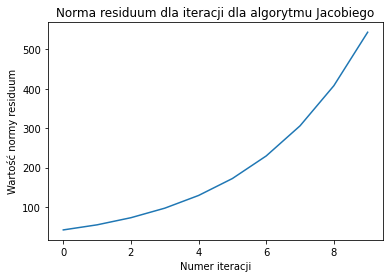

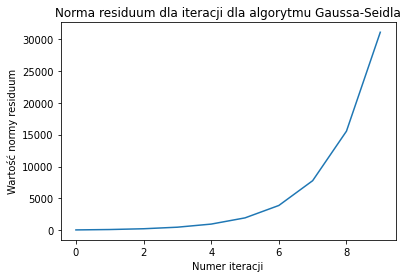

In [22]:
N = 948
a1 = 3
a2 = -1
a3 = -1
matrix = create_matrix(a1, a2, a3, N)
vector = create_vector(4, N)
result_jacobi = jacobi_C(matrix, vector)
result_gauss_seidel = gauss_seidel_C(matrix, vector)
#print(result_jacobi)
#print()
#print(result_gauss_seidel)
plt.plot(result_jacobi)
plt.title("Norma residuum dla iteracji dla algorytmu Jacobiego")
plt.xlabel("Numer iteracji")
plt.ylabel("Wartość normy residuum")
plt.show()
plt.plot(result_gauss_seidel)
plt.title("Norma residuum dla iteracji dla algorytmu Gaussa-Seidla")
plt.xlabel("Numer iteracji")
plt.ylabel("Wartość normy residuum")
plt.show()

Można zauważyć że dla powyższych parametrów norma residuum rośnie. Nie zbiega do zera. Oznacza to że algorytmy nie zbliżają się do dobrego wyniku. Wynika z tego, że te algorytmy nie nadają się do rozwiązywania wszystkich układów równań.

## Metoda bezpośrednia rozwiązywania układów równań liniowych

### Funkcja tworząca macierze L i U wykorzystywane przy faktoryzacji LU

Macierz L to macierz trójkątna dolna, a macierz U - trójkątna górna, takie że LUx = b, gdzie b jest wektorem danych wejściowych, a x jest wektorem wynikowym układu.

In [23]:
def matrix_factorization_LU(matrix):
    N = len(matrix)
    U = deepcopy(matrix)
    L = [[0 for i in range(N)] for j in range(N)]
    for i in range(N):
        L[i][i] = 1

    for k in range(N - 1):
        for j in range(k + 1, N):
            L[j][k] = U[j][k] / U[k][k]
            for i in range(k, N):
                U[j][i] = U[j][i] - L[j][k] * U[k][i]

    return L, U

### Algorytm bezpośreni rozwiązujący układy równań za pomocą faktoryzacji LU

In [24]:
def direct_algorithm(matrix, b):
    L, U = matrix_factorization_LU(matrix)
    y = solve_L_equation(L, b)
    x = solve_U_equation(U, y)
    return x

Wywołanie funkcji z parametrami z zadania C

In [26]:
N = 948
a1 = 3
a2 = -1
a3 = -1
matrix = create_matrix(a1, a2, a3, N)
vector = create_vector(4, N)
x = direct_algorithm(matrix, vector)
Ax = multiply_matrix_vector(matrix, x)
res = add_vectors(Ax, [(-1) * el for el in vector])
norm_res = norm(res)
print(norm_res)

6.079778909017103e-13


Można zauważyć że norma residuum jest bardzo niska rzędu 10 ^ (-13). Wynika z tego, że ta metoda daje bardzo zbliżony wynik do poprawnej wartości. 